In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\DATA\sales_data.csv")
df2=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\sales_data_Cleaned.csv")

In [3]:
df1.head()

,ProductID,Location,Date,UnitsSold,PromoCodeUsed
0,P0001,L01,2024-01-01,2,Yes
1,P0001,L01,2024-01-02,1,No
2,P0001,L01,2024-01-03,2,No
3,P0001,L01,2024-01-04,0,No
4,P0001,L01,2024-01-05,3,No


In [5]:
df1.isnull().sum()

ProductID           0
Location            0
Date                0
UnitsSold           0
PromoCodeUsed    5000
dtype: int64

In [6]:
categorical_cols = ['ProductID', 'Location', 'PromoCodeUsed']
date_col = 'Date'

for col in categorical_cols:
    print(f"\n🔸 Column: {col}")
    
    raw_counts = df1[col].value_counts(dropna=False)
    cleaned_counts = df2[col].value_counts(dropna=False)
    
    comparison = pd.concat([raw_counts, cleaned_counts], axis=1, keys=['Before', 'After']).fillna(0)
    comparison['Before'] = comparison['Before'].astype(int)
    comparison['After'] = comparison['After'].astype(int)
    comparison['Change'] = comparison['After'] - comparison['Before']
    comparison['% Change'] = (comparison['Change'] / comparison['Before'].replace(0, pd.NA)) * 100
    comparison['% Change'] = comparison['% Change'].round(2)

    print(comparison)



🔸 Column: ProductID
           Before  After  Change  % Change
ProductID                                 
P0500         600    600       0       0.0
P0001         600    600       0       0.0
P0002         600    600       0       0.0
P0003         600    600       0       0.0
P0484         600    600       0       0.0
...           ...    ...     ...       ...
P0009         600    600       0       0.0
P0008         600    600       0       0.0
P0007         600    600       0       0.0
P0006         600    600       0       0.0
P0005         600    600       0       0.0

[500 rows x 4 columns]

🔸 Column: Location
          Before  After  Change  % Change
Location                                 
L01        30000  30000       0       0.0
L02        30000  30000       0       0.0
L03        30000  30000       0       0.0
L04        30000  30000       0       0.0
L05        30000  30000       0       0.0
L06        30000  30000       0       0.0
L07        30000  30000       0       0.

In [7]:
print("Rows in df1 (raw sale data):", len(df1))
print("Rows in df2 (cleaned sale data):", len(df2))
print("Difference:", len(df1) - len(df2))


Rows in df1 (raw sale data): 300000
Rows in df2 (cleaned sale data): 300000
Difference: 0


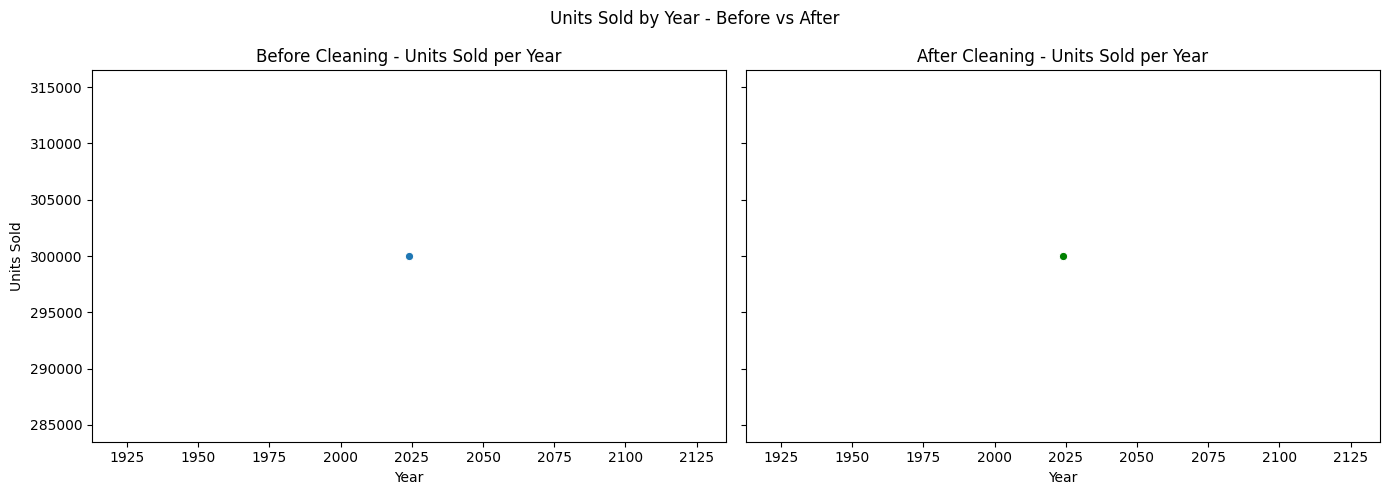

In [8]:
# Convert Date to datetime
df1['SaleYear'] = pd.to_datetime(df1['Date'], errors='coerce').dt.year
df2['SaleYear'] = pd.to_datetime(df2['Date'], errors='coerce').dt.year

# Compare sale counts per year
sale_year_1 = df1['SaleYear'].value_counts().sort_index()
sale_year_2 = df2['SaleYear'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.lineplot(ax=axes[0], x=sale_year_1.index, y=sale_year_1.values, marker='o')
axes[0].set_title("Before Cleaning - Units Sold per Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Units Sold")

sns.lineplot(ax=axes[1], x=sale_year_2.index, y=sale_year_2.values, marker='o', color='green')
axes[1].set_title("After Cleaning - Units Sold per Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Units Sold")

plt.suptitle("Units Sold by Year - Before vs After")
plt.tight_layout()
plt.show()


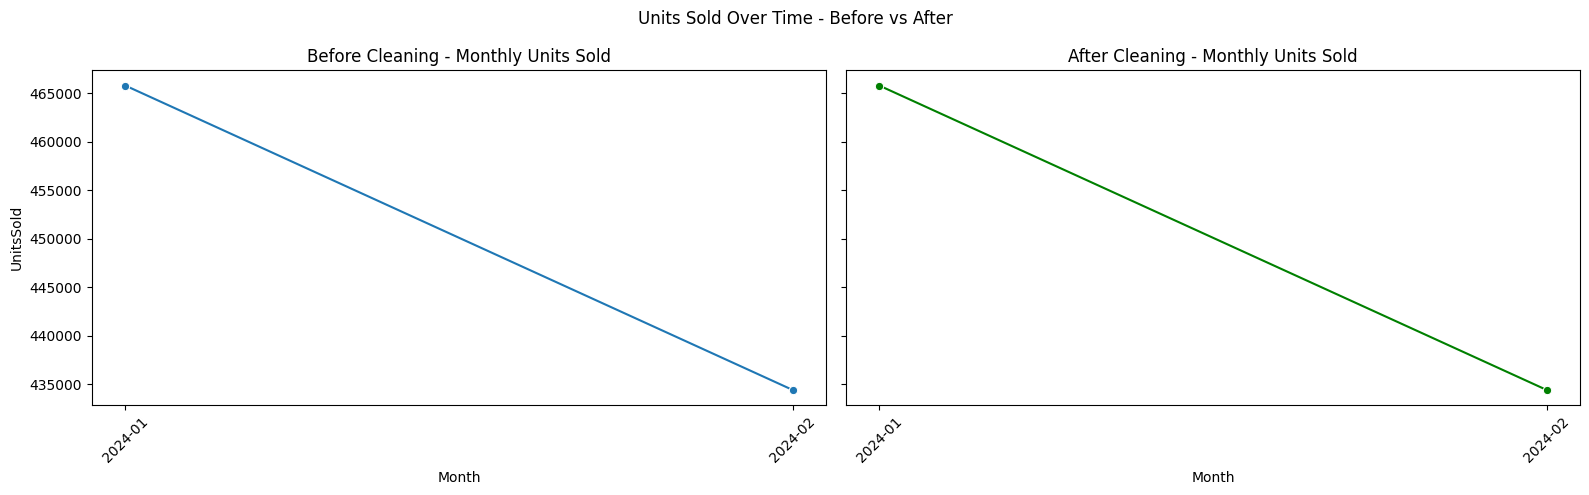

In [10]:


# Convert date
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

# Extract Year-Month
df1['Month'] = df1['Date'].dt.to_period('M').astype(str)
df2['Month'] = df2['Date'].dt.to_period('M').astype(str)

# Group
monthly_1 = df1.groupby('Month')['UnitsSold'].sum().reset_index()
monthly_2 = df2.groupby('Month')['UnitsSold'].sum().reset_index()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.lineplot(ax=axes[0], data=monthly_1, x='Month', y='UnitsSold', marker='o')
axes[0].set_title("Before Cleaning - Monthly Units Sold")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1], data=monthly_2, x='Month', y='UnitsSold', marker='o', color='green')
axes[1].set_title("After Cleaning - Monthly Units Sold")
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Units Sold Over Time - Before vs After")
plt.tight_layout()
plt.show()


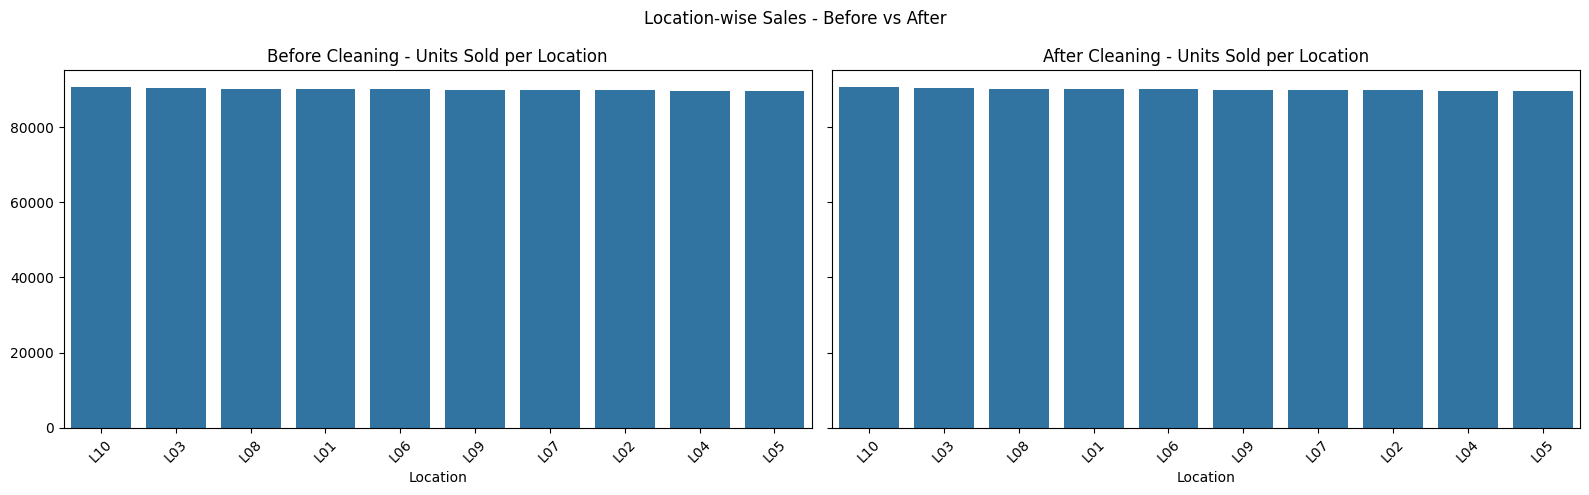

In [11]:
loc1 = df1.groupby('Location')['UnitsSold'].sum().sort_values(ascending=False)
loc2 = df2.groupby('Location')['UnitsSold'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.barplot(ax=axes[0], x=loc1.index, y=loc1.values)
axes[0].set_title("Before Cleaning - Units Sold per Location")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x=loc2.index, y=loc2.values)
axes[1].set_title("After Cleaning - Units Sold per Location")
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Location-wise Sales - Before vs After")
plt.tight_layout()
plt.show()


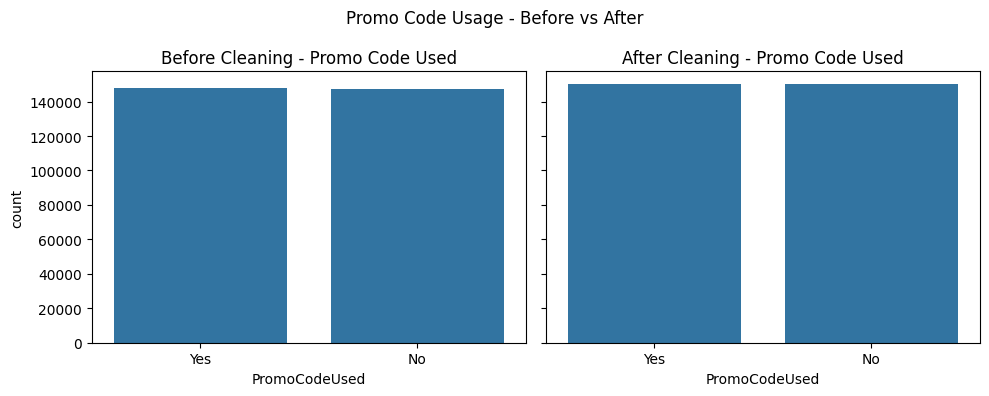

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.countplot(ax=axes[0], data=df1, x='PromoCodeUsed')
axes[0].set_title("Before Cleaning - Promo Code Used")
axes[0].set_xlabel("PromoCodeUsed")

sns.countplot(ax=axes[1], data=df2, x='PromoCodeUsed')
axes[1].set_title("After Cleaning - Promo Code Used")
axes[1].set_xlabel("PromoCodeUsed")

plt.suptitle("Promo Code Usage - Before vs After")
plt.tight_layout()
plt.show()


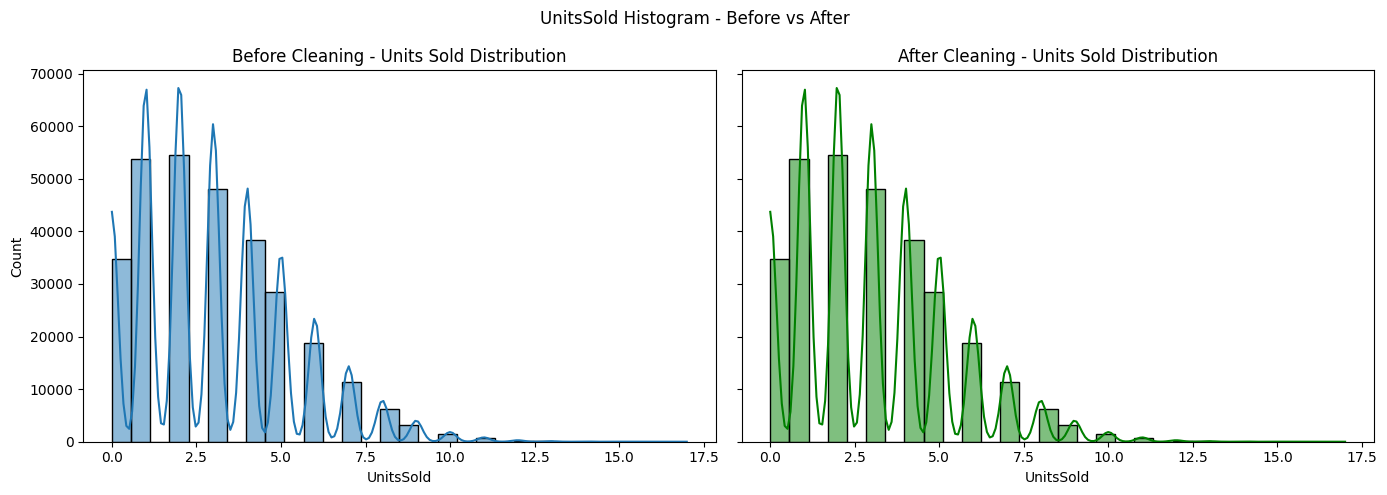

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(ax=axes[0], data=df1, x='UnitsSold', bins=30, kde=True)
axes[0].set_title("Before Cleaning - Units Sold Distribution")

sns.histplot(ax=axes[1], data=df2, x='UnitsSold', bins=30, kde=True, color='green')
axes[1].set_title("After Cleaning - Units Sold Distribution")

plt.suptitle("UnitsSold Histogram - Before vs After")
plt.tight_layout()
plt.show()
